In [131]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from niftystocks import ns
from sklearn.decomposition import PCA

In [132]:
get_nifty50 = ns.get_nifty50_with_ns()
print(get_nifty50)
data = yf.download(get_nifty50, start="2020-01-01", end="2021-01-01")
returns = data['Adj Close'].pct_change()
returns = returns.iloc[1:]
returns = returns.dropna(axis=1)
print(returns)


['HDFCBANK.NS', 'IOC.NS', 'SHREECEM.NS', 'TATAMOTORS.NS', 'ADANIPORTS.NS', 'ULTRACEMCO.NS', 'BHARTIARTL.NS', 'HEROMOTOCO.NS', 'HINDUNILVR.NS', 'GRASIM.NS', 'TATASTEEL.NS', 'UPL.NS', 'AXISBANK.NS', 'HDFC.NS', 'LT.NS', 'POWERGRID.NS', 'SBIN.NS', 'WIPRO.NS', 'INDUSINDBK.NS', 'INFY.NS', 'ONGC.NS', 'BAJAJFINSV.NS', 'CIPLA.NS', 'KOTAKBANK.NS', 'MARUTI.NS', 'TCS.NS', 'TITAN.NS', 'BPCL.NS', 'BRITANNIA.NS', 'EICHERMOT.NS', 'ICICIBANK.NS', 'RELIANCE.NS', 'ASIANPAINT.NS', 'BAJAJ-AUTO.NS', 'NESTLEIND.NS', 'BAJFINANCE.NS', 'COALINDIA.NS', 'HCLTECH.NS', 'HDFCLIFE.NS', 'HINDALCO.NS', 'DRREDDY.NS', 'GAIL.NS', 'DIVISLAB.NS', 'NTPC.NS', 'TECHM.NS', 'ITC.NS', 'JSWSTEEL.NS', 'M&M.NS', 'SBILIFE.NS', 'SUNPHARMA.NS']


[                       0%%                      ]

[*********************100%%**********************]  50 of 50 completed

1 Failed download:
['HDFC.NS']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
/tmp/ipykernel_18192/410076148.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data['Adj Close'].pct_change()


Ticker      ADANIPORTS.NS  ASIANPAINT.NS  AXISBANK.NS  BAJAJ-AUTO.NS  \
Date                                                                   
2020-01-02       0.014564      -0.001422     0.011019      -0.009238   
2020-01-03      -0.001697      -0.021919    -0.018495      -0.015684   
2020-01-06      -0.006013      -0.025266    -0.026516      -0.011198   
2020-01-07       0.012099       0.010105     0.003457       0.000099   
2020-01-08       0.002209       0.002552    -0.001722       0.007011   
...                   ...            ...          ...            ...   
2020-12-24       0.016569       0.002157     0.029960       0.019670   
2020-12-28       0.010448       0.013462     0.012209       0.011838   
2020-12-29      -0.000310       0.004807     0.020319       0.004935   
2020-12-30       0.004137       0.013942    -0.008093       0.004837   
2020-12-31      -0.003399       0.011008    -0.007439      -0.001189   

Ticker      BAJAJFINSV.NS  BAJFINANCE.NS  BHARTIARTL.NS   BPCL.

In [133]:
scaler = StandardScaler()
if not returns.empty:
    scaled_returns = scaler.fit_transform(returns)
else:
    raise ValueError("The returns DataFrame is empty. Ensure that the data is correctly downloaded and processed.")

kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_returns)
clusters = kmeans.predict(scaled_returns)

In [134]:
print("Number of stocks:", len(returns.columns))
print("Number of clusters:", len(clusters))
clustered_stocks = pd.DataFrame(list(zip(returns.columns, clusters)), columns=['Stock', 'Cluster'])
clustered_stocks.sort_values('Cluster', inplace=True)
clustered_stocks.head()

Number of stocks: 49
Number of clusters: 250


,Stock,Cluster
0,ADANIPORTS.NS,0
1,ASIANPAINT.NS,0
3,BAJAJ-AUTO.NS,0
4,BAJAJFINSV.NS,0
6,BHARTIARTL.NS,0


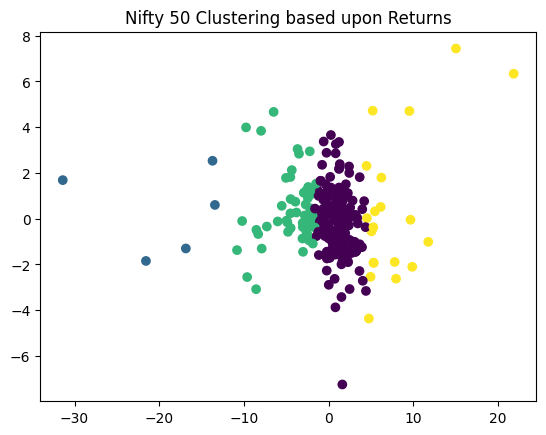

In [135]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_returns)

plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters, cmap='viridis')
plt.title('Nifty 50 Clustering based upon Returns')
plt.show()